In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Step 1: Clone the GitHub repo
!git clone https://github.com/ieee8023/covid-chestxray-dataset

# Step 2: Change directory
%cd covid-chestxray-dataset

# Step 3: List the files (images are inside 'images/' folder)
!ls images


Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Total 3641 (delta 0), reused 0 (delta 0), pack-reused 3641 (from 1)
Receiving objects: 100% (3641/3641), 632.96 MiB | 37.23 MiB/s, done.
Resolving deltas: 100% (1450/1450), done.
Updating files: 100% (1174/1174), done.
/content/covid-chestxray-dataset
000001-10.jpg
000001-11.jpg
000001-12.jpg
000001-13.jpg
000001-14.jpg
000001-15.jpg
000001-17.jpg
000001-18.jpg
000001-19.jpg
000001-1.jpg
000001-1.png
000001-20.jpg
000001-24.jpg
000001-266.jpg
000001-272.jpg
000001-27.jpg
000001-2.jpg
000001-2.png
000001-3.jpg
000001-3.png
000001-4.jpg
000001-4.png
000001-5.png
000001-6.jpg
000001-6.png
000001-7.jpg
000001-8.jpg
000001-9-a.jpg
000001-9-b.jpg
000001-9.jpg
000001.jpg
000001.png
000002-11-a.jpg
000002-11-b.jpg
000002-14.jpg
000002-16.jpg
000002-19-a.jpg
000002-19-b.jpg
000002-1.jpg
000002-268.jpg
000002-29.jpg
000002-2.jpg
000002-3.jpg
000002-3.png
000002-4.jpg
000002-4.png
000002-5.jpg
000002-6.jpg


In [3]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [4]:
# Load metadata
df = pd.read_csv('metadata.csv')
print(df.head())

  patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi 

In [5]:
len(df)

950

array([[<Axes: title={'center': 'offset'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'pO2_saturation'}>,
        <Axes: title={'center': 'leukocyte_count'}>,
        <Axes: title={'center': 'neutrophil_count'}>],
       [<Axes: title={'center': 'lymphocyte_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

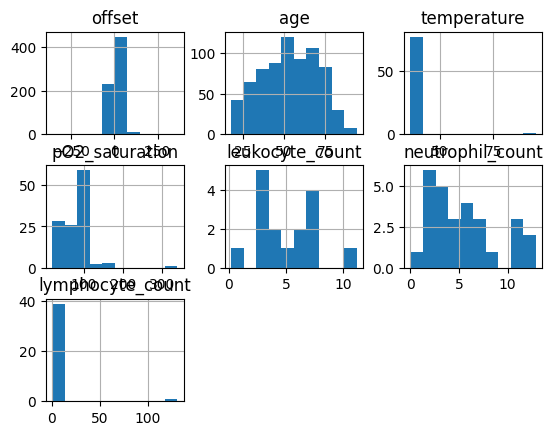

In [6]:
df.hist()

In [7]:
from PIL import Image
import os
import numpy as np

img_dir = "images"
img_path = os.path.join(img_dir, os.listdir(img_dir)[4])

img = Image.open(img_path)
img_array = np.array(img)

print("Image shape:", img_array.shape)
print("Image mode:", img.mode)


Image shape: (431, 489, 3)
Image mode: RGB


In [8]:
# Paths
src_img_dir = '/content/covid-chestxray-dataset/images'
metadata_csv = '/content/covid-chestxray-dataset/metadata.csv'
dst_base = '/content/covid_dataset'  # Output directory

df = df[['filename', 'finding']].dropna()
df['label'] = df['finding'].apply(lambda x: "COVID" if 'COVID' in x or 'SARS' in x else "NONCOVID")


In [9]:
# Split dataset
covid_df = df[df['label'] == "COVID"]
noncovid_df = df[df['label'] == "NONCOVID"]#.sample(len(covid_df), random_state=42)  # balance
print(len(noncovid_df)  )
print(len(covid_df))

350
600


In [10]:
df_balanced = pd.concat([covid_df, noncovid_df])
train_df, val_df = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced['label'], random_state=42)


In [11]:
print(len(train_df))
len(val_df)

760


190

In [12]:
# Create folders
for subset in ['train', 'val']:
    for cls in ['COVID', 'NONCOVID']:
        os.makedirs(os.path.join(dst_base, subset, cls), exist_ok=True)


In [13]:
# Copy images to folders
def copy_images(df, subset):
    for _, row in df.iterrows():
        src_path = os.path.join(src_img_dir, row['filename'])
        dst_path = os.path.join(dst_base, subset, row['label'], row['filename'])
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

copy_images(train_df, 'train')
copy_images(val_df, 'val')


In [14]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/ColabNotebooks/Dl_Dr_sallab_youtube/ved_5/task/Rsna_Pneumonia.keras',)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,548,933 (74.57 MB)

 Trainable params: 6,516,161 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 13,032,324 (49.71 MB)

In [15]:
from tensorflow.keras.models import load_model, Sequential

# Keep all layers except the last one
conv_base = Sequential(model.layers[:-4])

# Freeze the convolutional base
conv_base.trainable = False


## ofline augmantaion

In [16]:


base_dir = '/content/covid_dataset'  # Output directo

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
color_mode = 'grayscale'
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 14, 14, 128))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(128, 128),
        color_mode=color_mode,
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        batch_len = len(inputs_batch)
        features[i * batch_size : i * batch_size + batch_len] = features_batch
        labels[i * batch_size : i * batch_size + batch_len] = labels_batch

        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 760)
validation_features, validation_labels = extract_features(validation_dir, 190)



Found 742 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Found 187 images belonging

In [17]:
train_features = np.reshape(train_features, (760, 14 * 14 * 128))
validation_features = np.reshape(validation_features, (190, 14 * 14 * 128))


## Freeze the Pretrained Layers

In [18]:
for layer in model.layers[:-1]:  # freeze all except the last layer
    layer.trainable = False


In [19]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=14 * 14 * 128))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from tensorflow.keras import models, layers, optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - acc: 0.5676 - loss: 0.8365 - val_acc: 0.6474 - val_loss: 0.6960
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - acc: 0.6956 - loss: 0.5767 - val_acc: 0.7474 - val_loss: 0.6227
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - acc: 0.7317 - loss: 0.5326 - val_acc: 0.7474 - val_loss: 0.6026
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - acc: 0.7884 - loss: 0.4760 - val_acc: 0.8000 - val_loss: 0.5907
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - acc: 0.8139 - loss: 0.4675 - val_acc: 0.7789 - val_loss: 0.5947
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - acc: 0.8613 - loss: 0.3988 - val_acc: 0.7316 - val_loss: 0.6135
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - acc: 0.8588 - loss: 0.3932 - val_acc: 0.7737 - val_loss: 0.6029
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - acc: 0.8584 - loss: 0.3741 - val_acc: 0.7474 - val_loss: 0.6559
Epoch 9/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - acc: 0.86

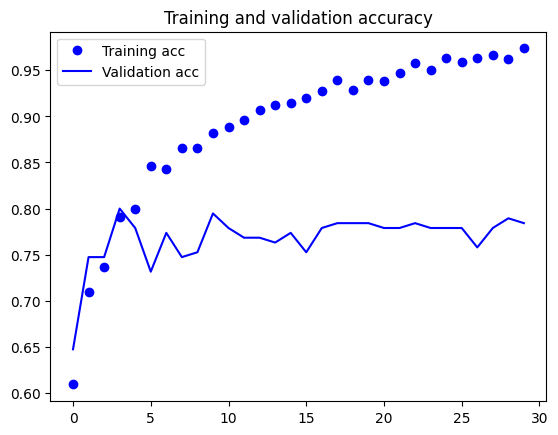

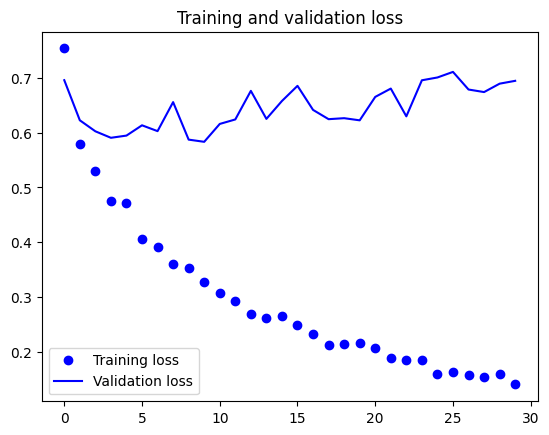

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Before we compile and train our model, a very important thing to do is to freeze the convolutional base. "Freezing" a layer or set of layers means preventing their weights from getting updated during training. If we don't do this, then the representations that were previously learned by the convolutional base would get modified during training. Since the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In Keras, freezing a network is done by setting its trainable attribute to False:

 However, our plots also indicate that we are overfitting almost from the start -- despite using dropout with a fairly large rate. This is because this technique does not leverage data augmentation, which is essential to preventing overfitting with small image datasets.

Now, let's review the second technique we mentioned for doing feature extraction, which is much slower and more expensive, but which allows us to leverage data augmentation during training: extending the conv_base model and running it end-to-end on the inputs. Note that this technique is in fact so expensive that you should only attempt it if you have access to a GPU: it is absolutely intractable on CPU. If you cannot run your code on GPU, then the previous technique is the way to go.

In [23]:
from keras import models
from keras import layers
# --- Simple CNN Model ---
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = models.Sequential()
model.add(conv_base,)
model.add( BatchNormalization(),)
model.add(MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))


model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 14, 14, 128)      │        93,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (32, 14, 14, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 7, 7, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 6272)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 300)              │     1,881,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 256)              │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 200)              │        51,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 200)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,104,637 (8.03 MB)

 Trainable params: 2,010,813 (7.67 MB)

 Non-trainable params: 93,824 (366.50 KB)

In [25]:
conv_base.trainable = True
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 22


In [26]:
conv_base.trainable = False

In [27]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 10


With this setup, only the weights from the two Dense layers that we added will be trained. That's a total of four weight tensors: two per layer (the main weight matrix and the bias vector). Note that in order for these changes to take effect, we must first compile the model. If you ever modify weight trainability after compilation, you should then re-compile the model, or these changes would be ignored.

Now we can start training our model, with the same data augmentation configuration that we used in our previous example:

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator(
      rescale=1./255,
      #preprocessing_function=preprocess_input,  #importan
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale=1./255,)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(128, 128),
        color_mode='grayscale',

        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=23,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      )


Found 742 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
23/23 - 35s - 2s/step - acc: 0.5652 - loss: 0.7343 - val_acc: 0.6625 - val_loss: 0.6555
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 - 6s - 283ms/step - acc: 0.3333 - loss: 0.6731 - val_acc: 0.6562 - val_loss: 0.6527
Epoch 3/30
23/23 - 41s - 2s/step - acc: 0.5676 - loss: 0.7615 - val_acc: 0.6500 - val_loss: 0.6770
Epoch 4/30
23/23 - 6s - 245ms/step - acc: 0.5625 - loss: 0.6904 - val_acc: 0.6562 - val_loss: 0.6635
Epoch 5/30
23/23 - 41s - 2s/step - acc: 0.6324 - loss: 0.6929 - val_acc: 0.6625 - val_loss: 0.6762
Epoch 6/30
23/23 - 12s - 507ms/step - acc: 0.5938 - loss: 0.7887 - val_acc: 0.6625 - val_loss: 0.6600
Epoch 7/30
23/23 - 81s - 4s/step - acc: 0.6000 - loss: 0.7193 - val_acc: 0.6438 - val_loss: 0.6609
Epoch 8/30
23/23 - 5s - 214ms/step - acc: 0.5625 - loss: 0.7063 - val_acc: 0.6500 - val_loss: 0.6683
Epoch 9/30
23/23 - 41s - 2s/step - acc: 0.6268 - loss: 0.6681 - val_acc: 0.6500 - val_loss: 0.6315
Epoch 10/30
23/23 - 6s - 282ms/step - acc: 0.5000 - loss: 0.8544 - val_acc: 0.6875 - val_loss: 0.6152
Epoch 11/30
23/23 - 81s - 4s/step - acc: 0.6211 - loss: 0.6800 - val_acc: 0.6625 - val_loss: 0.6650
Epoch 12

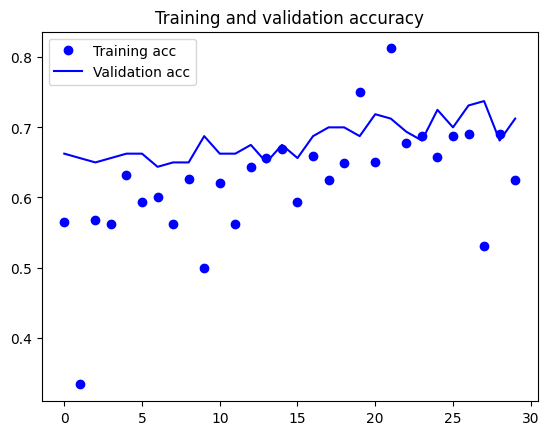

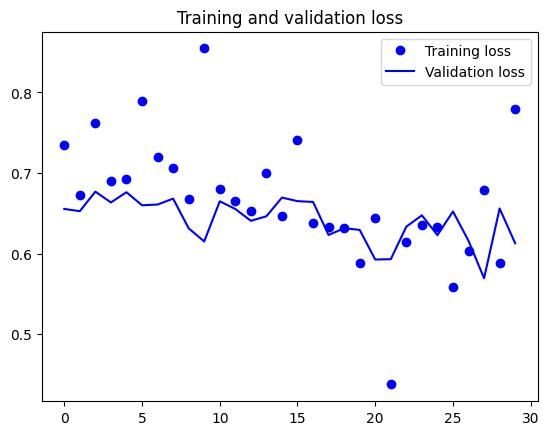

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()